In [1]:
import yfinance as yf

In [2]:
df = yf.download('AAPL', start="2010-01-01")
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470742,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481927,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378825,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409363,447610800
...,...,...,...,...,...,...
2024-04-03,168.789993,170.679993,168.580002,169.649994,169.649994,47691700
2024-04-04,170.289993,171.919998,168.820007,168.820007,168.820007,53704400
2024-04-05,169.589996,170.389999,168.949997,169.580002,169.580002,42055200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3590 entries, 2010-01-04 to 2024-04-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3590 non-null   float64
 1   High       3590 non-null   float64
 2   Low        3590 non-null   float64
 3   Close      3590 non-null   float64
 4   Adj Close  3590 non-null   float64
 5   Volume     3590 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 196.3 KB


In [4]:
from pmdarima.arima import auto_arima

model = auto_arima(df['Close'], seasonal=False, alpha=0.05, trace=2)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13010.840, Time=2.84 sec
First viable model found (13010.840)
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13061.977, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13061.123, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13061.000, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13063.223, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13062.990, Time=0.72 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13062.981, Time=1.12 sec
Near non-invertible roots for order (3, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.45 sec
Near non-invertible roots for order (2, 1, 3)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=3.37 sec
 ARIMA(1,1,1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3590
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -6499.420
Date:                Tue, 09 Apr 2024   AIC                          13010.840
Time:                        11:16:09   BIC                          13047.954
Sample:                             0   HQIC                         13024.069
                               - 3590                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1721      0.094      1.821      0.069      -0.013       0.357
ar.L1         -1.8570      0.005   -355.961      0.000      -1.867      -1.847
ar.L2         -0.9744      0.005   -190.213      0.000      -0.984      -0.964
ma.L1          1.8460      0.007    265.060      0.000       1.832       1.860
ma.L2          0.9550      0.007    138.605      0.000       0.941       0.968
sigma2         2.1899      0.021    102.978      0.000       2.148       2.232
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             15493.73
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):              77.07   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

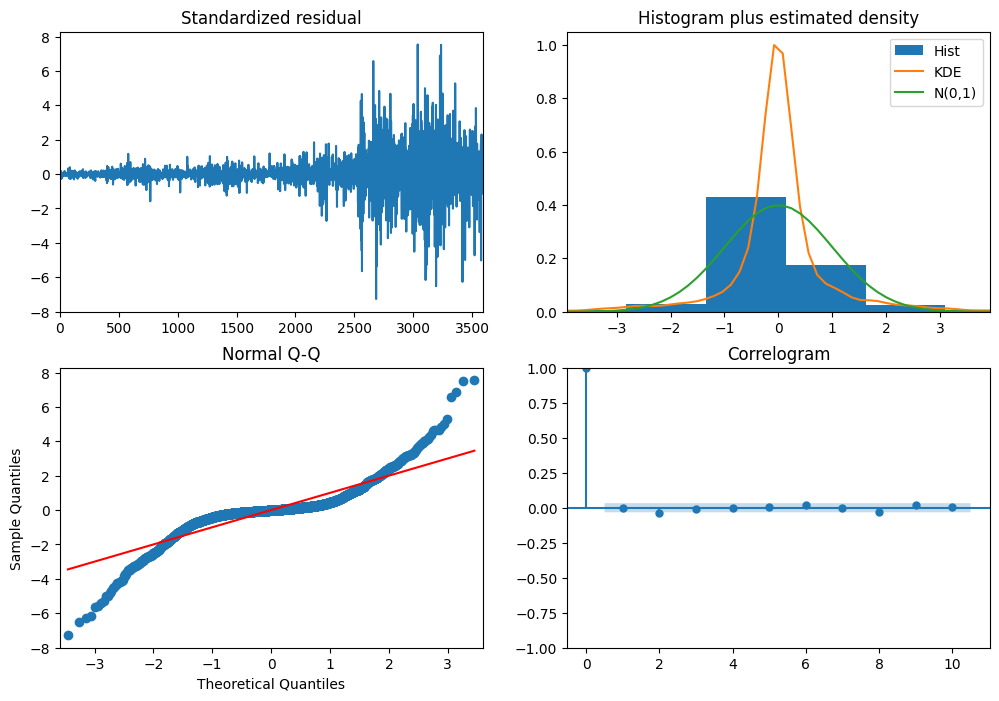

In [5]:
import matplotlib.pyplot as plt
model.plot_diagnostics(figsize=(12,8))

plt.show()

In [6]:
from statsmodels.tsa.arima.model import ARIMA

def forecast(history):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit()
    
    output = model_fit.forecast()
    return output[0]

close = df['Close'].values
size = int(len(close) * 0.8)
train, test = close[0:size], close[size:len(close)]

history = [x for x in train]
predictions = []
for t in range(len(test)):
    yhat = forecast(history)
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

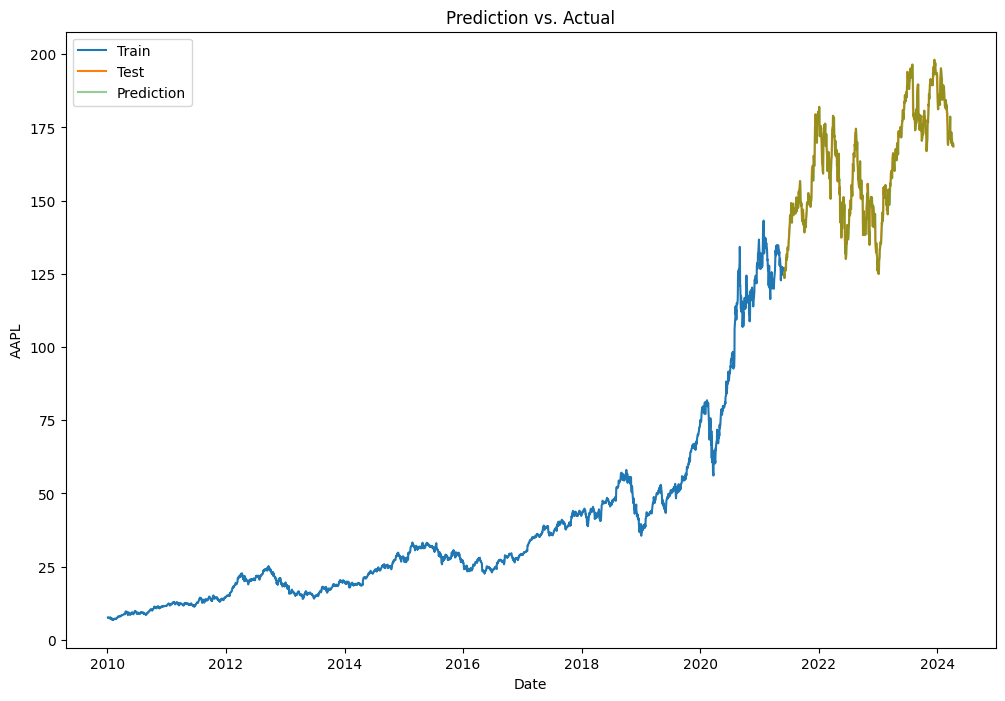

In [7]:
plt.figure(figsize=(12, 8))
plt.plot(df[['Close']].iloc[:size,:].index, train, label='Train')
plt.plot(df[['Close']].iloc[size:,:].index, test, label='Test')
plt.plot(df[['Close']].iloc[size:,:].index, predictions, label='Prediction', alpha=0.5)
plt.title('Prediction vs. Actual')
plt.xlabel('Date')
plt.ylabel('AAPL')
plt.legend()
plt.show()

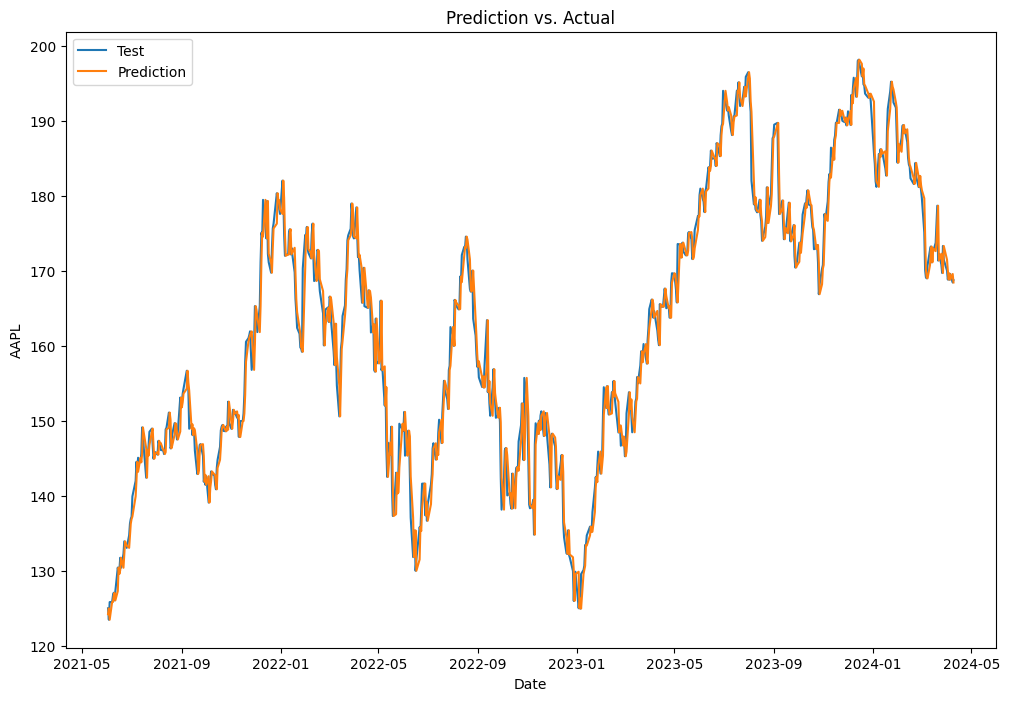

In [8]:
plt.figure(figsize=(12, 8))
plt.plot(df[['Close']].iloc[size:,:].index, test, label='Test')
plt.plot(df[['Close']].iloc[size:,:].index, predictions, label='Prediction')
plt.title('Prediction vs. Actual')
plt.xlabel('Date')
plt.ylabel('AAPL')
plt.legend()
plt.show()